# Estatística & Probabilidade - 2024/01

## Projeto 03 - Uma introdução ao aprendizado de máquina

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `654q7wf`

### Milton Salgado Leandro

#### DRE: 122169279

### Pedro Henrique Honorio Saito

#### DRE: 122149392

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é domingo 14/07/2024 às 23h59, prazo improrrogável. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, usando a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em "Atividades"
            
  - No tema "Projetos", clique em "Projeto 03" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 03".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada, caso não tenha sido gerada por você.

* O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito. Porém, vamos evitar problemas de "eu fiz tudo e ele/a não fez nada"! Infelizmente não tenho como controlar isso, e após o projeto entregue não adianta "eu fiz tudo sozinho/a", pois eu não estava lá para ver! Tentem se resolver entre si, mas em último caso posso auxiliar com uma mediação.

* No caso de trabalho em dupla, apenas **uma** pessoa da dupla deverá fazer o envio do trabalho, claro, deixando explícito quem é o/a parceiro/a.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada dupla (ou indivíduo) deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

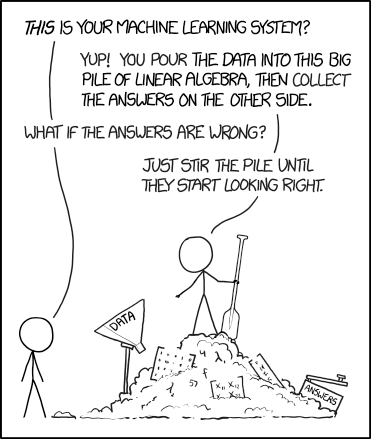

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})),$$ que vale $0$ se $Y = g(\mathbf{X})$ ou $1$ se $Y \neq g(\mathbf{X})$. Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X})).$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática - atributos contínuos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo
- Sendo $\mathbf{X}$ contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

#### Formulação matemática - atributos discretos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório discreto
- Sendo $\mathbf{X}$ discreto, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d)$$ $$= \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

### Classificador de Bayes ingênuo Bernoulli

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **discreto** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é discreto, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{Bern}(p_{dj})$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [4]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados. Vamos baixar a base e ver o DataFrame que a contém:

In [5]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

In [6]:
print(X.shape)
display(X)

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vejamos agora o vetor `y`, bem como o seu tamanho:

In [7]:
print(y.shape)
display(y)

(70000,)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

In [8]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0].reshape(28, 28)        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

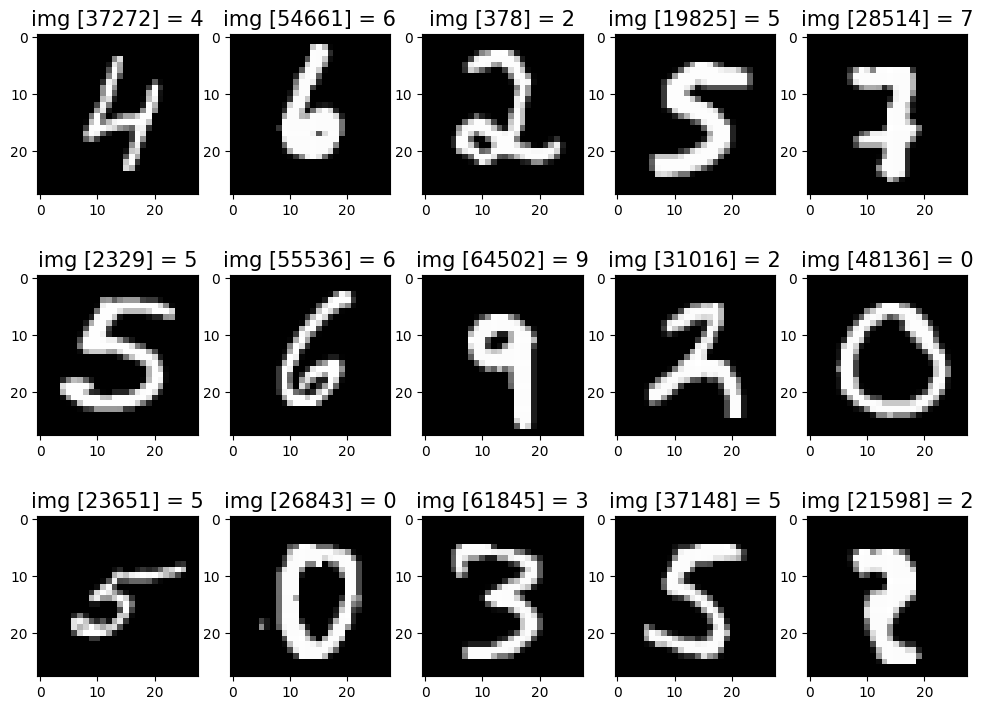

In [9]:
random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 8


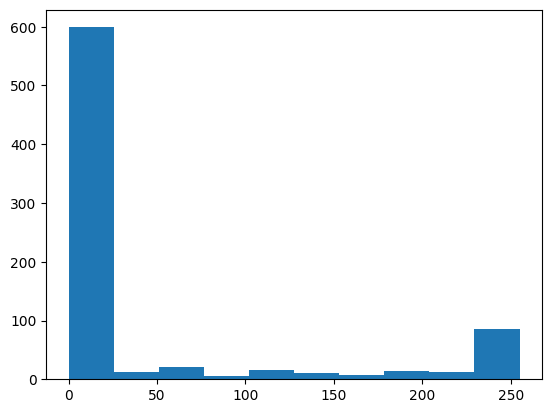

In [10]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando os classificadores de Bayes ingênuo gaussiano e Bernoulli que discutimos acima.

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

ATENÇÃO! Se você rodar a célula abaixo mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso!

In [11]:
X = X/255

**QUESTÃO 1:** Os classificadores de Bayes ingênuo gaussiano e Bernoulli têm duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos) ou Bernoulli (com parâmetro desconhecido). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

Abaixo segue um breve *spoiler* da análise exploratória.

Montando e exibindo a matriz de correlação dos *pixels*, condicionado em um dígito específico:

In [12]:
dig = 5
corr_dig = (X[y == str(dig)] + np.random.normal(loc = 0, scale = 0.001, size = X[y == str(dig)].shape)).corr() # Com maracutaia!
corr_dig[0, 0] = -1 # Com maracutaia!

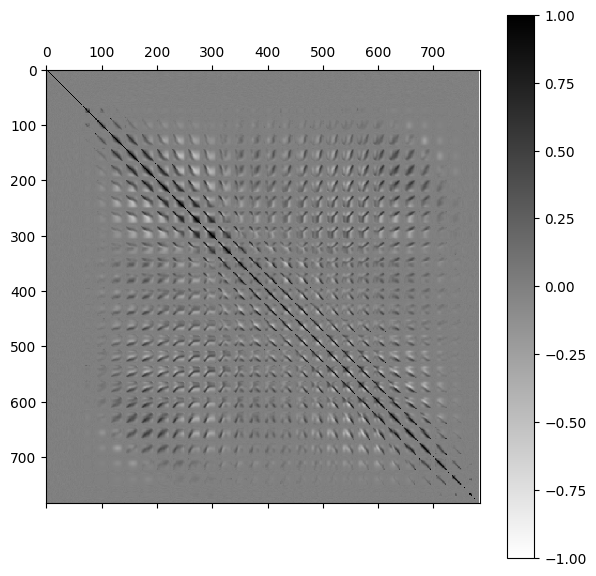

In [13]:
plt.figure(figsize = (7, 7))
plt.matshow(corr_dig, cmap = 'binary', fignum = 1)
plt.colorbar()
plt.show()

Histograma de determinado *pixel*, condicionado em um dígito específico: 

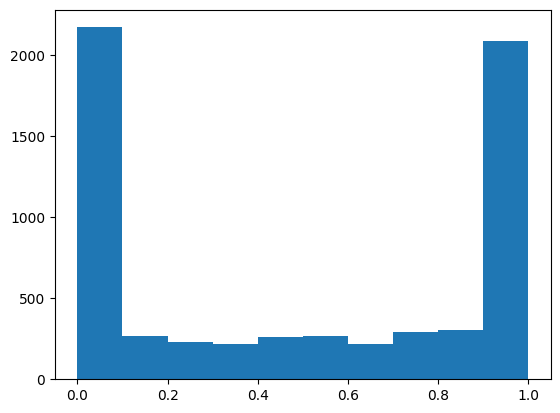

In [14]:
dig = 5
pixel = 350
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

#### Solução

Quando analisamos o problema de classificar símbolos, especialmente números, percebemos que cada pixel de uma imagem pode ser tratado como uma variável. Podemos analisar esses pixels de forma algorítmica, sem nos preocupar com as cores específicas que eles representam. As cores dos pixels variam de 0 a 255, onde 0 é preto e 255 é branco. Para simplificar a análise, normalizamos esses valores dividindo-os por 255, o que faz com que o preto continue sendo 0 e o branco se torne 1. Dessa forma, facilitamos os cálculos estatísticos necessários para identificar os números.

No entanto, sabemos que a classificação dos números envolve mais do que apenas pixels independentes. A forma como os pixels se organizam é crucial para definir qual número está sendo representado. 

Para descrever os pixels (nossas variáveis), podemos usar distribuições normais com parâmetros desconhecidos e tentar estimar \(P(X = x | Y = d)\). Embora isso funcione em alguns casos, problemas surgem porque a cor média de um pixel (cinza, que é 128 ou 0,5) pode ser comum, mas os pixels completamente pretos ou brancos não seguem bem essa distribuição.

Outra abordagem é modelar os pixels usando distribuições de Bernoulli, onde os valores se concentram em 0 e 1 (as cores 0 e 255). Isso pode funcionar bem para números escritos de forma clara, com forte contraste entre preto e branco. Contudo, também encontramos pixels em tons de cinza (valores intermediários entre 0 e 1), o que dificulta a análise usando essa distribuição.

Conseguimos entender melhor essas questões com as seguintes análises:

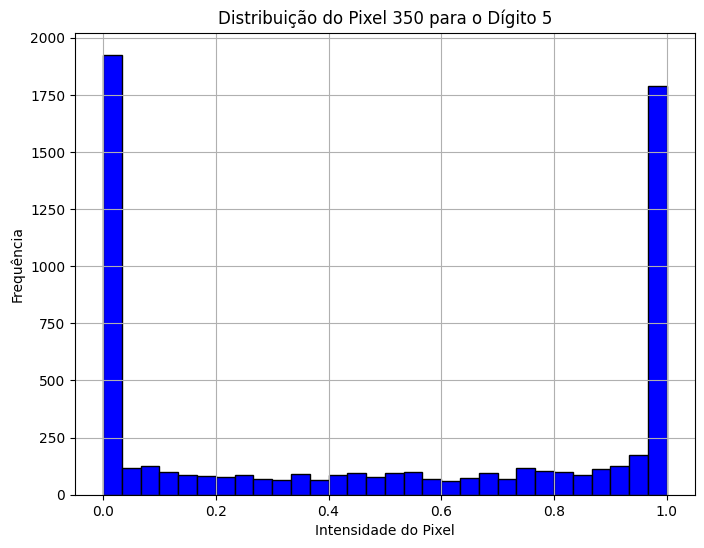

In [15]:
# Exemplo de discrepância na distribuição de Bernoulli

# Definindo o dígito e o pixel a serem analisados
dig = 5
pixel = 350

# Plotando o histograma para o pixel específico do dígito selecionado
plt.figure(figsize=(8, 6))
plt.hist(X[y == str(dig)]['pixel' + str(pixel)], bins=30, color='blue', edgecolor='black')
plt.title(f'Distribuição do Pixel {pixel} para o Dígito {dig}')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

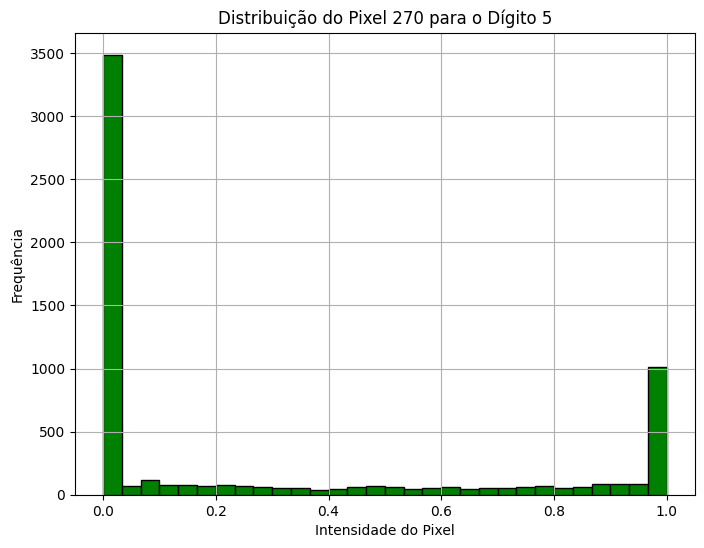

In [16]:
# Testando novamente o dígito 5, mas agora no píxel 270

# Definindo o dígito e o pixel a serem analisados
dig = 5
pixel = 270

# Plotando o histograma para o pixel específico do dígito selecionado
plt.figure(figsize=(8, 6))
plt.hist(X[y == str(dig)]['pixel' + str(pixel)], bins=30, color='green', edgecolor='black')
plt.title(f'Distribuição do Pixel {pixel} para o Dígito {dig}')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

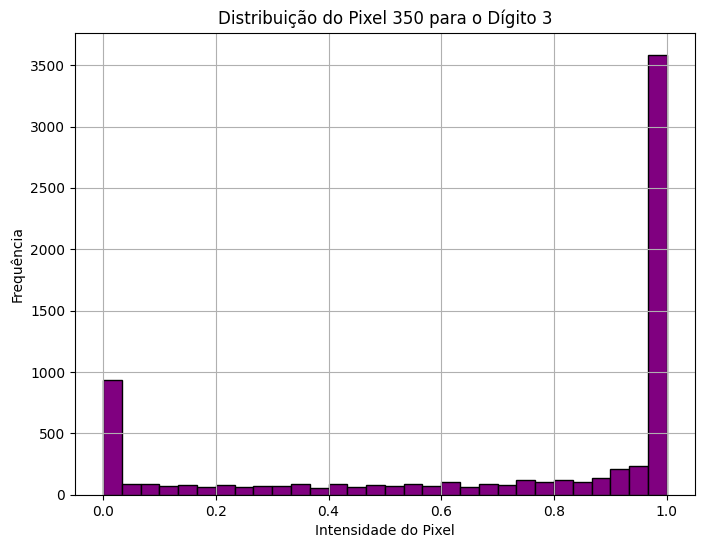

In [17]:
# Distribuição mais próxima da Bernoulli para o dígito 3 no píxel 350

# Definindo o dígito e o pixel a serem analisados
dig = 3
pixel = 350

# Plotando o histograma para o pixel específico do dígito selecionado
plt.figure(figsize=(8, 6))
plt.hist(X[y == str(dig)]['pixel' + str(pixel)], bins=30, color='purple', edgecolor='black')
plt.title(f'Distribuição do Pixel {pixel} para o Dígito {dig}')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** As classes que vamos usar para fazer o nosso procedimento são as `GaussianNB` e `BernoulliNB`, localizadas dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e ao `BernoulliNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), e as página direcionadas através do *link* "User Guide", onde encontram-se as formulações matemática por trás dos método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

#### Solução

### Gaussian Naive Bayes (GaussianNB)

O **Gaussian Naive Bayes (GaussianNB)** é um algoritmo de aprendizado de máquina que usa o Teorema de Bayes para classificação. Ele assume que os atributos são independentes e seguem uma distribuição normal. O modelo estima a média (\(\mu\)) e o desvio padrão (\(\sigma\)) para cada classe utilizando o método da máxima verossimilhança, que minimiza os erros em relação à distribuição dos dados.

#### Comparação com Outros Métodos de Classificação Contínua:

- **Independência das Variáveis**: Assim como outros métodos, assume que os atributos são independentes, o que pode não ser totalmente verdadeiro na prática.
- **Distribuição Normal**: Supõe que os atributos seguem uma distribuição normal, apropriada para muitas aplicações.
- **Estimação dos Parâmetros**: Estima \(\mu\) e \(\sigma\) para cada classe com base nos dados de treinamento, usando-os para calcular a probabilidade de um conjunto de atributos pertencer a uma classe, aplicando o Teorema de Bayes.

Fórmula do GaussianNB:

$$
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
$$

### Bernoulli Naive Bayes (BernoulliNB)

O **Bernoulli Naive Bayes (BernoulliNB)** é adequado para dados discretos, usando o Teorema de Bayes de forma semelhante. Ele assume que os atributos são independentes e seguem uma distribuição de Bernoulli, onde cada atributo é binário (0 ou 1). O BernoulliNB binariza os dados de entrada, convertendo valores contínuos em binários com base em um limite.

#### Comparação com Métodos de Classificação Discreta:

- **Independência das Variáveis**: Assume independência entre os atributos, simplificando o modelo.
- **Distribuição de Bernoulli**: Específico para atributos binários, onde a presença ou ausência de um atributo é codificada como 1 ou 0.
- **Binarização dos Dados**: Converte dados contínuos em binários, ajustando um limite para essa conversão.

Fórmula do BernoulliNB:

$$
P(x_i \mid y) = P(x_i = 1 \mid y) x_i + (1 - P(x_i = 1 \mid y)) (1 - x_i)
$$

### Métodos `fit`, `predict` e `predict_proba`:

- **fit**: Ajusta os parâmetros do modelo aos dados de treinamento, aprendendo os parâmetros específicos de cada classe.
  
- **predict**: Classifica novos dados de entrada, determinando a classe mais provável para cada conjunto de atributos.
  
- **predict_proba**: Retorna as probabilidades associadas a cada classe para uma dada entrada, permitindo uma análise detalhada da confiança do modelo.

Esses métodos são fundamentais para aplicar o Teorema de Bayes na classificação de dados, seja para atributos contínuos com GaussianNB ou discretos com BernoulliNB.

**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` e o `BernoulliNB` para treinar os modelos de Bayes ingênuo gaussiano e Bernoulli nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

### Solução

#### Explicação do Gaussian Naive Bayes

1. **Instanciação e Treinamento do Modelo:**
   - `GaussianNB()` cria uma instância do modelo Gaussian Naive Bayes.
   - `fit(X_train, y_train)` treina o modelo com os dados de treinamento `X_train` e os respectivos rótulos `y_train`.

2. **Predição e Probabilidades Preditas:**
   - `predict(X_test)` realiza predições utilizando os dados de teste `X_test`.
   - `predict_proba(X_test)` calcula as probabilidades previstas para cada classe usando `predict_proba`.

3. **Avaliação do Desempenho do Modelo:**
   - `score(X_test, y_test)` calcula a acurácia do modelo nos dados de teste, que é a proporção de predições corretas.
   - Contagem de predições corretas e incorretas comparando as predições com os rótulos verdadeiros.

4. **Exibição dos Resultados:**
   - Exibe a acurácia, quantidade de acertos e quantidade de erros do modelo.

Esse código é essencial para treinar, testar e avaliar um modelo Gaussian Naive Bayes em um conjunto de dados específico. Ele fornece métricas importantes como acurácia e detalhes sobre a precisão das predições, ajudando a entender o desempenho do modelo na tarefa de classificação probabilística.

#### Explicação do Bernoulli Naive Bayes

1. **Instanciação e Treinamento do Modelo:**
   - `BernoulliNB()` cria uma instância do modelo Bernoulli Naive Bayes.
   - `fit(X_train, y_train)` treina o modelo com os dados de treinamento `X_train` e os respectivos rótulos `y_train`.

2. **Predição e Probabilidades Preditas:**
   - `predict(X_test)` realiza predições utilizando os dados de teste `X_test`.
   - `predict_proba(X_test)` calcula as probabilidades previstas para cada classe usando `predict_proba`.

3. **Avaliação do Desempenho do Modelo:**
   - `score(X_test, y_test)` calcula a acurácia do modelo nos dados de teste, que é a proporção de predições corretas.
   - Contagem de predições corretas e incorretas comparando as predições com os rótulos verdadeiros.

4. **Exibição dos Resultados:**
   - Exibe a acurácia, quantidade de acertos e quantidade de erros do modelo.

Esse código é essencial para treinar, testar e avaliar um modelo Bernoulli Naive Bayes em um conjunto de dados binários. Ele fornece métricas importantes como acurácia e detalhes sobre a precisão das predições, ajudando a entender o desempenho do modelo na tarefa de classificação binária.

In [19]:
# Instanciando e treinando o modelo Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Realizando predições e obtendo probabilidades preditas
gauss_pred = gnb.predict(X_test)
gauss_predict_proba = gnb.predict_proba(X_test)

# Avaliando o desempenho do modelo
accuracy = gnb.score(X_test, y_test)
correct_predictions = np.sum(gauss_pred == y_test)
incorrect_predictions = np.sum(gauss_pred != y_test)

# Exibindo os resultados
print('Acurácia:', accuracy)
print('Quantidade de acertos:', correct_predictions)
print('Quantidade de erros:', incorrect_predictions)

Acurácia: 0.5503
Quantidade de acertos: 5503
Quantidade de erros: 4497


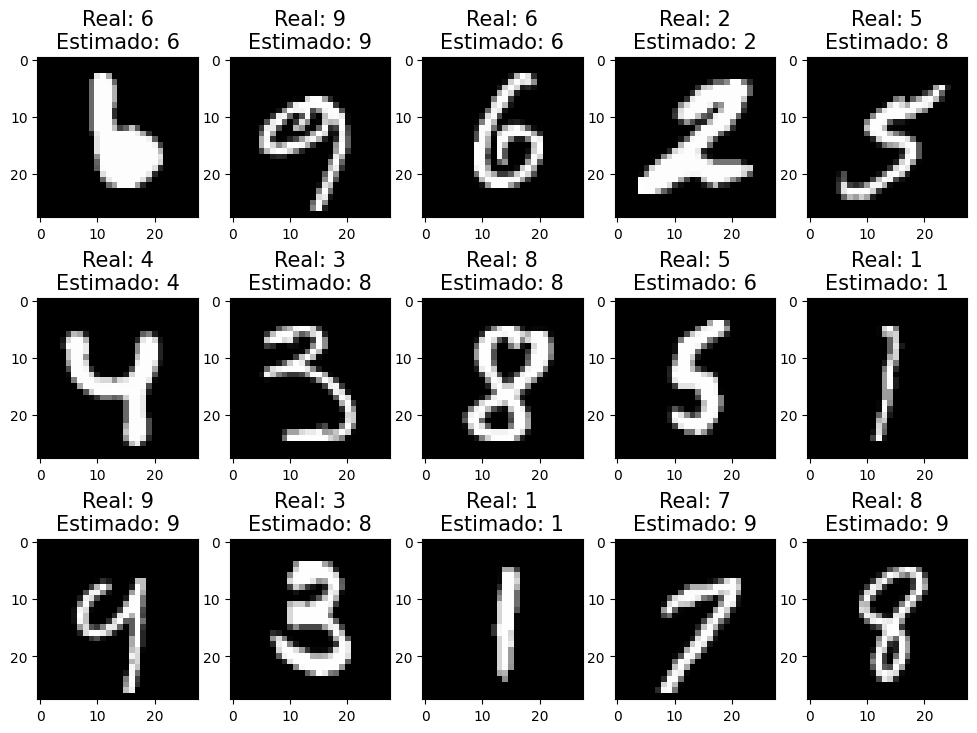

In [20]:
random_images = []  # Lista para armazenar imagens e suas legendas

# Seleciona aleatoriamente 15 imagens do conjunto de testes
for _ in range(15):
    random_index = random.choice(X_test.index)  # Escolhe um índice aleatório do conjunto de teste
    real_label = 'Real: ' + str(y.loc[random_index])  # Obtém a classe real da imagem selecionada
    predicted_label = 'Estimado: ' + str(gauss_pred[X_test.index.get_loc(random_index)])  # Obtém a classe estimada pelo modelo

    # Adiciona a imagem e suas legendas à lista de imagens aleatórias
    random_images.append((X_test.loc[random_index].values, real_label + '\n' + predicted_label))

# Exibe as imagens aleatórias e suas legendas
show_images([img[0] for img in random_images], [img[1] for img in random_images])

In [21]:
# Instanciando e treinando o modelo Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Realizando predições e obtendo probabilidades preditas
bernoulli_pred = bnb.predict(X_test)
bernoulli_predict_proba = bnb.predict_proba(X_test)

# Avaliando o desempenho do modelo
accuracy = bnb.score(X_test, y_test)
correct_predictions = np.sum(bernoulli_pred == y_test)
incorrect_predictions = np.sum(bernoulli_pred != y_test)

# Exibindo os resultados
print('Acurácia:', accuracy)
print('Quantidade de acertos:', correct_predictions)
print('Quantidade de erros:', incorrect_predictions)

Acurácia: 0.8315
Quantidade de acertos: 8315
Quantidade de erros: 1685


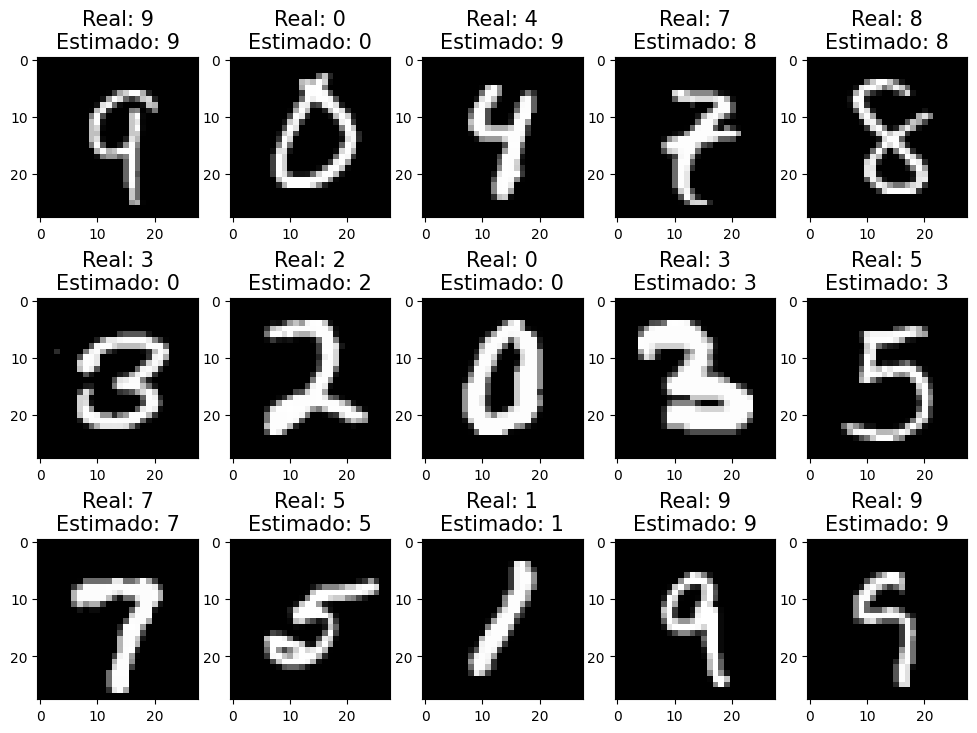

In [22]:
random_images = []  # Lista para armazenar imagens e suas legendas

# Seleciona aleatoriamente 15 imagens do conjunto de testes
for _ in range(15):
    random_index = random.choice(X_test.index)  # Escolhe um índice aleatório do conjunto de teste
    real_label = 'Real: ' + str(y.loc[random_index])  # Obtém a classe real da imagem selecionada
    predicted_label = 'Estimado: ' + str(bernoulli_pred[X_test.index.get_loc(random_index)])  # Obtém a classe estimada pelo modelo

    # Adiciona a imagem e suas legendas à lista de imagens aleatórias
    random_images.append((X_test.loc[random_index].values, real_label + '\n' + predicted_label))

# Exibe as imagens aleatórias e suas legendas
show_images([img[0] for img in random_images], [img[1] for img in random_images])


**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? E para o classificador de Bayes ingênuo Bernoulli? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

### Solução

Para calcular a quantidade de parâmetros necessários na estimativa dos classificadores Gaussian Naive Bayes e Bernoulli Naive Bayes, é fundamental considerar três aspectos principais: o número de classes (representando os dígitos de algarismos que podem ser escritos), o número de atributos (que são os pixels da imagem) e o número de parâmetros associados a cada distribuição de probabilidade.

No contexto deste problema, temos 10 classes diferentes, correspondendo aos dígitos de 0 a 9, e cada imagem possui um total de 784 pixels (28 x 28). Isso nos permite calcular o número total de parâmetros necessários para ajustar os modelos da seguinte maneira:

$$
\text{Número de parâmetros de ajuste} = \text{Número de classes} \times \text{Número de atributos} \times \text{Número de parâmetros da distribuição}
$$

Para o modelo Gaussian Naive Bayes, onde os atributos são assumidos como seguindo uma distribuição normal (gaussiana), cada atributo é caracterizado por dois parâmetros: a média ($\mu$) e o desvio padrão ($\sigma$). Portanto, o cálculo dos parâmetros para o modelo Gaussiano é:

$$
\text{Número de parâmetros de ajuste do modelo Gaussiano} = 10 \times 784 \times 2 = 15680 \text{ parâmetros}
$$

Já para o modelo Bernoulli Naive Bayes, os atributos são considerados seguindo uma distribuição de Bernoulli, onde cada atributo possui um único parâmetro ($p$) que representa a probabilidade de sucesso (ou a presença do atributo). Assim, o número de parâmetros para o modelo Bernoulli é:

$$
\text{Número de parâmetros de ajuste do modelo Bernoulli} = 10 \times 784 \times 1 = 7840 \text{ parâmetros}
$$

Comparando esses números, observamos que o modelo Gaussiano requer aproximadamente o dobro de parâmetros em comparação com o modelo Bernoulli. Isso reflete na complexidade e na capacidade de generalização dos modelos, onde um número maior de parâmetros pode potencialmente levar a um ajuste excessivo (overfitting) aos dados de treinamento.

Além disso, é importante destacar que, apesar do número significativo de parâmetros necessários, a qualidade da análise estatística desses modelos depende criticamente do tamanho do conjunto de dados de teste. Com um conjunto de teste robusto contendo 60000 observações, a aplicação de princípios estatísticos fundamentais como a Lei dos Grandes Números e o Teorema Central do Limite é mais eficaz, garantindo uma avaliação precisa e confiável do desempenho dos modelos na prática.

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

#### Avaliação do Desempenho do Modelo

Para avaliar o desempenho do nosso classificador, utilizamos a matriz de confusão, uma tabela que permite visualizar como um algoritmo de classificação se comporta ao comparar os valores reais com as previsões feitas pelo modelo. A partir desta matriz, podemos calcular a acurácia, que representa a proporção de predições corretas feitas pelo modelo em relação ao total de predições realizadas.

A matriz de confusão é estruturada da seguinte forma:

$$
\begin{array}{|c|c|c|c|c|}
\hline
 & \text{Classe 1} & \text{Classe 2} & \ldots & \text{Classe n} \\
\hline
\text{Classe 1} & n_{11} & n_{12} & \ldots & n_{1n} \\
\text{Classe 2} & n_{21} & n_{22} & \ldots & n_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\text{Classe n} & n_{n1} & n_{n2} & \ldots & n_{nn} \\
\hline
\end{array}
$$

Onde ($n_{ij}$) representa o número de observações da classe ($i$) que foram classificadas como sendo da classe ($j$).

A acurácia, por sua vez, é calculada como:

$$
\text{Acurácia} = \frac{\text{Número de acertos}}{\text{Número total de previsões}} = \frac{\sum_{i=1}^{n} n_{ii}}{\sum_{i=1}^{n} \sum_{j=1}^{n} n_{ij}}
$$

Além da acurácia, outra métrica importante é a precisão, que representa a dispersão estatística dos resultados, ou seja, a medida de quão próximos os resultados individuais estão uns dos outros. Enquanto a acurácia foca na proporção de predições corretas, a precisão avalia a consistência dos resultados do modelo.

É crucial calcular essas métricas usando o conjunto de teste, pois o conjunto de treinamento já foi utilizado para ensinar o modelo. Utilizar o conjunto de treinamento para calcular a acurácia poderia levar a uma estimativa enviesada do desempenho real do modelo, já que ele estaria familiarizado com esses dados e não seria capaz de generalizar adequadamente para novos dados.

Portanto, há uma relação intrínseca entre acurácia, score e matriz de confusão, uma vez que a acurácia é derivada diretamente da matriz de confusão, que é o que o método `score` de avaliação retorna no contexto da classificação de modelos.

In [23]:
# Calculando acurácia usando matriz de confusão para o modelo Gaussiano

# Criando a matriz de confusão entre os rótulos verdadeiros (y_test) e as predições (gauss_pred)
cm_gauss = confusion_matrix(y_test, gauss_pred)

acertos_totais = 0  # Variável para contar o número total de acertos

# Iterando sobre cada classe para calcular a acurácia individual
for i in range(len(cm_gauss)):
    sum = np.sum(cm_gauss[i])  # Calcula o total de amostras da classe i
    acerto_classe = cm_gauss[i][i]  # Obtém o número de predições corretas para a classe i
    acuracia_classe = acerto_classe / sum  # Calcula a acurácia da classe i
    print('Classe', i, ':', acuracia_classe)  # Imprime a acurácia da classe i

    acertos_totais += acerto_classe  # Soma o número de acertos desta classe aos acertos totais

# Calcula a acurácia total dividindo o número total de acertos pelo número total de exemplos no conjunto de teste
acuracia_total = acertos_totais / len(y_test)
print('\nAcurácia total:', acuracia_total)  # Imprime a acurácia total do modelo

Classe 0 : 0.8732251521298174
Classe 1 : 0.9404444444444444
Classe 2 : 0.26926926926926925
Classe 3 : 0.3872549019607843
Classe 4 : 0.14051282051282052
Classe 5 : 0.05543237250554324
Classe 6 : 0.9338085539714868
Classe 7 : 0.27927063339731284
Classe 8 : 0.6041025641025641
Classe 9 : 0.9416498993963782

Acurácia total: 0.5503


In [24]:
# Calculando acurácia usando matriz de confusão para o modelo Bernoulli

# Criando a matriz de confusão entre os rótulos verdadeiros (y_test) e as predições (bernoulli_pred)
cm_bernoulli = confusion_matrix(y_test, bernoulli_pred)

acertos_totais = 0  # Variável para contar o número total de acertos

# Iterando sobre cada classe para calcular a acurácia individual
for i in range(len(cm_bernoulli)):
    sum = np.sum(cm_bernoulli[i])  # Calcula o total de amostras da classe i
    acerto_classe = cm_bernoulli[i][i]  # Obtém o número de predições corretas para a classe i
    acuracia_classe = acerto_classe / sum  # Calcula a acurácia da classe i
    print('Classe', i, ':', acuracia_classe)  # Imprime a acurácia da classe i

    acertos_totais += acerto_classe  # Soma o número de acertos desta classe aos acertos totais

# Calcula a acurácia total dividindo o número total de acertos pelo número total de exemplos no conjunto de teste
acuracia_total = acertos_totais / len(y_test)
print('\nAcurácia total:', acuracia_total)  # Imprime a acurácia total do modelo Bernoulli

Classe 0 : 0.8894523326572008
Classe 1 : 0.9546666666666667
Classe 2 : 0.8258258258258259
Classe 3 : 0.8176470588235294
Classe 4 : 0.8
Classe 5 : 0.6962305986696231
Classe 6 : 0.8839103869653768
Classe 7 : 0.8416506717850288
Classe 8 : 0.7589743589743589
Classe 9 : 0.8169014084507042

Acurácia total: 0.8315


In [25]:
# Calculando score usando o conjunto de treinamento, o que não é recomendado:
# O score no conjunto de treinamento pode ser enganoso, pois o modelo pode memorizar os dados.

# Score do modelo Gaussiano com conjunto de Treino
print('Score do modelo Gaussiano com conjunto de Treino:', gnb.score(X_train, y_train))

# Score do modelo Bernoulli com conjunto de Treino
print('Score do modelo Bernoulli com conjunto de Treino:', bnb.score(X_train, y_train))

# Calculando score usando o conjunto de teste:
# O score no conjunto de teste fornece uma avaliação mais realista do desempenho do modelo.

# Score do modelo Gaussiano com conjunto de Teste
print('\nScore do modelo Gaussiano com conjunto de Teste:', gnb.score(X_test, y_test))

# Score do modelo Bernoulli com conjunto de Teste
print('Score do modelo Bernoulli com conjunto de Teste:', bnb.score(X_test, y_test))

# Comentário adicional sobre a comparação dos scores:
# O resultado de ambos não foi muito diferente já que utilizamos muito mais dados para treinar o modelo do que para testar (60000 contra 10000)

Score do modelo Gaussiano com conjunto de Treino: 0.5559
Score do modelo Bernoulli com conjunto de Treino: 0.83285

Score do modelo Gaussiano com conjunto de Teste: 0.5503
Score do modelo Bernoulli com conjunto de Teste: 0.8315


**QUESTÃO 6:** Use o código dado abaixo para exibir as matrizes de confusão, bem como uma representação gráfica mais amigável delas. Analise os erros cometidos pelos classificadores e tente justificá-los, com base nas hipóteses dos classificadores e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional dos classificadores! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

In [26]:
'''
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

labels = y.cat.categories
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()
'''

'\n# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.\n\nlabels = y.cat.categories\ncm = confusion_matrix(y_test, y_test_pred, labels=labels)\nprint(cm)\ndisp = ConfusionMatrixDisplay(cm, display_labels = labels)\ndisp.plot()\nplt.show()\n'

### Solução

#### Implementação do Classificador Aleatório ("Péssimo"):

1. **Classificador Aleatório (Baseline)**:
   ```python
   rand = np.random.choice(y.cat.categories, size=len(y_test))
   ```
   Um classificador aleatório é criado selecionando aleatoriamente categorias de classe do vetor `y.cat.categories`.

2. **Obtenção das Categorias de Classe**:
   ```python
   labels = y.cat.categories
   ```
   As categorias de classe são extraídas do objeto `y`, presumivelmente um vetor de rótulos de classe categórica.

3. **Cálculo da Matriz de Confusão**:
   ```python
   cm = confusion_matrix(y_test, rand, labels=labels)
   ```
   A matriz de confusão é calculada comparando os rótulos verdadeiros `y_test` com as previsões aleatórias `rand`. O parâmetro `labels=labels` garante que as categorias sejam ordenadas corretamente na matriz de confusão.

4. **Exibição da Matriz de Confusão**:
   ```python
   print(cm)
   disp = ConfusionMatrixDisplay(cm, display_labels=labels)
   disp.plot()
   plt.show()
   ```
   A matriz de confusão calculada é impressa na tela, e uma visualização gráfica é exibida.

#### Implementação do Modelo Gaussiano (GaussianNB):

1. **Cálculo da Matriz de Confusão**:
   ```python
   labels = y.cat.categories
   cm = confusion_matrix(y_test, gauss_pred, labels=labels)
   ```
   Calcula a matriz de confusão comparando os rótulos verdadeiros `y_test` com as previsões do modelo Gaussiano `gauss_pred`, utilizando as categorias de classe `labels`.

2. **Exibição da Matriz de Confusão**:
   ```python
   print(cm)
   disp = ConfusionMatrixDisplay(cm, display_labels=labels)
   disp.plot()
   plt.show()
   ```
   Imprime a matriz de confusão calculada e exibe uma visualização gráfica.

#### Implementação do Modelo Bernoulli (BernoulliNB):

1. **Cálculo da Matriz de Confusão**:
   ```python
   labels = y.cat.categories
   cm = confusion_matrix(y_test, bernoulli_pred, labels=labels)
   ```
   Calcula a matriz de confusão comparando os rótulos verdadeiros `y_test` com as previsões do modelo Bernoulli `bernoulli_pred`, utilizando as categorias de classe `labels`.

2. **Exibição da Matriz de Confusão**:
   ```python
   print(cm)
   disp = ConfusionMatrixDisplay(cm, display_labels=labels)
   disp.plot()
   plt.show()
   ```
   Imprime a matriz de confusão calculada e exibe uma visualização gráfica.

### Comentários Adicionais:

- O classificador aleatório serve como uma linha de base para comparar o desempenho dos outros modelos.
- A matriz de confusão ajuda a entender como cada modelo classifica as diferentes classes e identifica áreas de confusão.
- Utilizar `ConfusionMatrixDisplay` facilita a visualização clara da matriz de confusão, ajudando na interpretação dos resultados do modelo em termos de precisão e recall para cada classe.

[[105 106  92  93  89  94 102 109  99  97]
 [117 121 130  95 105 107 122 100 106 122]
 [113  91 100 101  89 108 109  91 101  96]
 [ 87  90 117 109  99 110 111 116  95  86]
 [111  83  98 103  78  97 113 104  86 102]
 [ 97  75  76  94  83  97  97  90  94  99]
 [103  90  97  93  82  97 103  95 109 113]
 [ 93 102  91 104 107  96 125 112 109 103]
 [ 99 104 100  82  95  99 103  92  81 120]
 [104 101  90 104  99 119  90 106  91  90]]


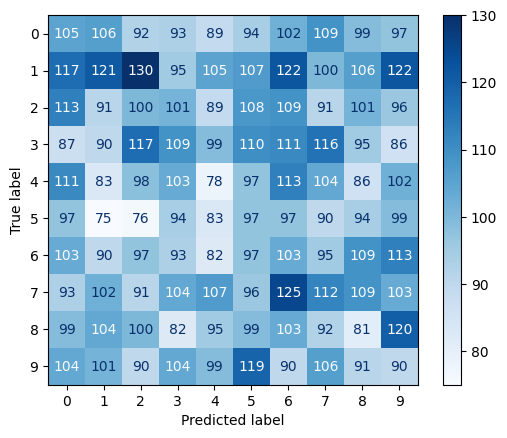

In [27]:
# Utilizando um classificador "péssimo"

# Classificador aleatório (baseline)
rand = np.random.choice(y.cat.categories, size=len(y_test))

# Obtenção das categorias de classe
labels = y.cat.categories

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, rand, labels=labels)

# Exibição da matriz de confusão usando ConfusionMatrixDisplay
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.show()

[[ 861    3    4    0    1    3   52    1   42   19]
 [   0 1058    4    4    0    3   19    0   24   13]
 [  89   30  269   92    4    4  275    0  216   20]
 [  33   61    6  395    0    4   59    4  342  116]
 [  26    5   10    3  137   10  113    4  188  479]
 [  84   20    3   17    6   50   73    3  548   98]
 [  14   17    6    0    1    6  917    0   19    2]
 [   3    7    4   10    4    1    2  291   30  690]
 [  18  107    4    7    3    7   25    2  589  213]
 [   5    9    1    4    7    0    0   13   19  936]]


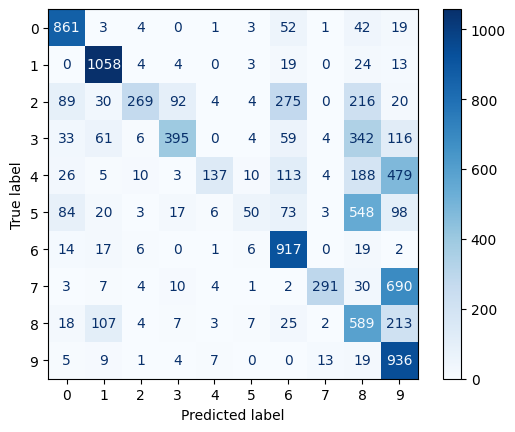

In [28]:
# Cálculo da matriz de confusão para o modelo Gaussiano (gnb)
labels = y.cat.categories  # Obtém as categorias de classe
cm = confusion_matrix(y_test, gauss_pred, labels=labels)  # Calcula a matriz de confusão
print(cm)  # Exibe a matriz de confusão calculada

# Exibição da matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=labels)  # Configura a exibição da matriz de confusão
disp.plot(cmap='Blues')  # Plota a matriz de confusão
plt.show()  # Exibe a plotagem da matriz de confusão

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

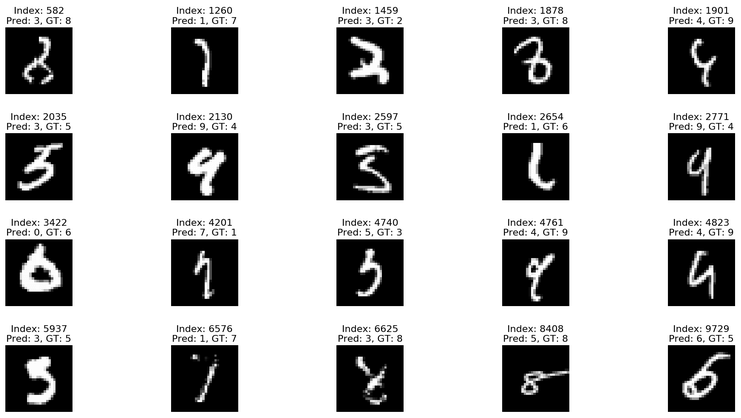

### Solução

### Suposições

No modelo de Naive Bayes, fazemos duas suposições principais que podem ser melhoradas: a independência entre as variáveis e a distribuição dos atributos (especialmente no modelo Gaussiano). Embora o modelo de Bernoulli se ajuste melhor aos dados, ele ainda supõe que as variáveis são independentes, o que não é verdade para a classificação de dígitos, onde a configuração dos pixels importa.

Para melhorar o modelo, poderíamos usar o classificador de Bernoulli sem assumir a independência entre os pixels. Isso poderia ser feito analisando a correlação entre os pixels para identificar relações que aumentem a precisão do modelo, embora essa abordagem seja bastante complexa.

Outra opção é usar um classificador mais robusto, como o MLP (Multilayer Perceptron), uma rede neural que não assume independência entre variáveis. O MLP oferece alta precisão (cerca de 98%), mas é computacionalmente caro, o que pode ser impraticável para grandes conjuntos de dados.

### Explicação do Código

1. **Instanciação do Modelo**:
   ```python
   mlp = MLPClassifier(hidden_layer_sizes=(100, 100))
   ```
   Cria uma instância do MLPClassifier com duas camadas ocultas, cada uma com 100 neurônios.

2. **Treinamento do Modelo**:
   ```python
   mlp.fit(X_train, y_train)
   ```
   Treina o modelo com os dados de treino `X_train` e seus rótulos `y_train`.

3. **Predição**:
   ```python
   mlp_pred = mlp.predict(X_test)
   ```
   Usa o modelo treinado para fazer previsões nos dados de teste `X_test`.

4. **Avaliação da Acurácia**:
   ```python
   mlp.score(X_test, y_test)
   ```
   Calcula e imprime a acurácia do modelo com base nos dados de teste.

5. **Contagem de Acertos e Erros**:
   ```python
   np.sum(mlp_pred == y_test)
   np.sum(mlp_pred != y_test)
   ```
   Conta e imprime o número de predições corretas e incorretas, respectivamente.

O código demonstra como usar o MLPClassifier para treinar e avaliar uma rede neural com duas camadas ocultas para a classificação de dígitos. Os resultados do MLP são apresentados abaixo, mostrando a eficácia do modelo.

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100))

# Treinamento do modelo com os dados de treino
mlp.fit(X_train, y_train)

# Predição usando os dados de teste
mlp_pred = mlp.predict(X_test)

print('Acurácia:', mlp.score(X_test, y_test))

# Cálculo da quantidade de acertos e erros
correct_predictions = np.sum(mlp_pred == y_test)
incorrect_predictions = np.sum(mlp_pred != y_test)
print('Quantidade de acertos:', correct_predictions)
print('Quantidade de erros:', incorrect_predictions)

Acurácia: 0.9772
Quantidade de acertos: 9772
Quantidade de erros: 228


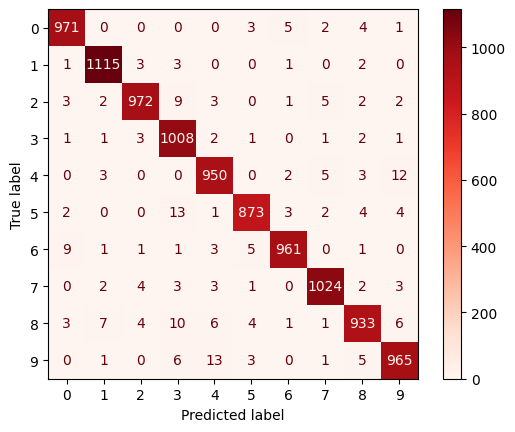

In [32]:
# Obtenção das categorias de classes
labels = y.cat.categories

# Cálculo da matriz de confusão entre as previsões do MLP e os valores reais
cm = confusion_matrix(y_test, mlp_pred, labels=labels)

# Configuração e exibição da matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(cmap='Reds')

# Exibição da plotagem da matriz de confusão
plt.show()